In [2]:
import pandas as pd
import seaborn as sns
dados = pd.read_csv('dados.csv')

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# 2. Distribuição de Frequência
***


Quando construímos distribuições de frequências com variáveis quantitativas, precisamos, na maior parte dos casos, definir as classes em que desejamos agrupar os nossos dados. O pandas nos oferece a função cut() para realizar esta tarefa.

Analise o seguinte código:

classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

# 3. Calculando uma Média 
***
Obtenha a sua média aritmética.

Observação: Na variável Sexo, 'H' representa os homens e 'M' as mulheres.


In [4]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [5]:
dataset['Idade'].mean()

46.1

In [6]:
dataset.groupby(['Sexo']).mean()

,Idade
Sexo,
H,45.750000
M,46.333333


#4. Medidas Separatizes 
***

Observe que o código de UF igual a 29 representa o estado da Bahia e o de número 35 o estado de São Paulo. Note também que estamos considerando somente as pessoas com rendimento de até R$ 10.000,00.

Com as informações acima, avalie as alternativas abaixo e indique qual é verdadeira.

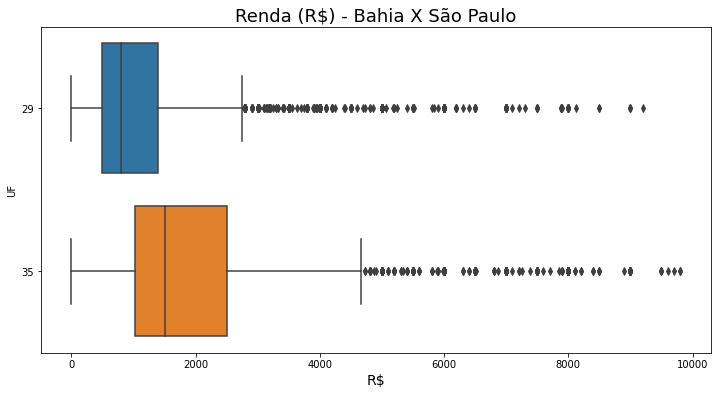

In [7]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('(UF==35 or UF==29) and Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 6)
ax.set_title('Renda (R$) - Bahia X São Paulo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

# 5. Medidas de Dispersão
***

O DataFrame acima só considera as notas de Fulano e Sicrano que apresentaram medidas de tendência central idênticas.

Indique a opção que mostra o aluno que possui a maior dispersão em suas notas e o valor do desvio médio absoluto deste aluno, respectivamente.

In [8]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Sicrano
Matemática,8,7.5
Português,10,8.0
Inglês,4,7.0
Geografia,8,8.0
História,6,8.0
Física,10,8.5
Química,8,7.0


In [9]:
df['Sicrano'].mad()

0.4693877551020408

In [10]:
df['Fulano'].mad()

1.5510204081632648

Considere o dataset abaixo:
Observação: Na variável Sexo, 'H' representa os homens e 'M' as mulheres.

Assinale a alternativa que apresenta o valor do desvio padrão da variável Idade.

In [11]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [12]:
dataset['Idade'].std()

14.184890239656813

Considere o mesmo dataset do problema anterior:
Observação: Na variável Sexo, 'H' representa os homens e 'M' as mulheres.

Assinale a alternativa que apresenta o valor do desvio padrão da variável Idade somente para as mulheres.

In [13]:
dataset.groupby(['Sexo']).std()

,Idade
Sexo,
H,11.898879
M,16.645320
